# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

#FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

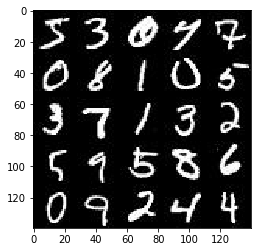

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

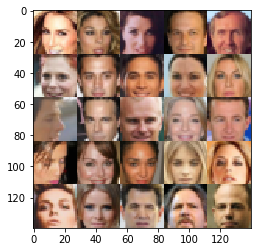

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.9.0


C:\Users\amkle\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_imges = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'input_imges')
    z_data = tf.placeholder(tf.float32, shape=(None, z_dim), name = 'z_data')
    learning_rate = tf.placeholder(tf.float32, shape=None, name = 'learning_rate')

    return input_imges, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 32x32x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    with tf.variable_scope('generator', reuse = not is_train):
    # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(0.1 * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(0.1 * x2, x2)
        # 14x14x128 now
        
        # Output layer
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x2, training=True)
        x3 = tf.maximum(0.1 * x3, x3)
        # 28x28x3 now
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    # Build the model
    g_model = generator(input_z, out_channel_dim)
    # g_model is the generator output
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    out_channel_dim = [1 if data_image_mode == 'L' else 3]
    
    real_inputs, z_inputs, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(real_inputs, z_inputs, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    batch_num = 0
    saver = tf.train.Saver()
    samples, losses = [], []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_num += 1
                #rescale images
                batch_images = batch_images * 2
                #make samples to feed to generator
                sample_z = np.random.uniform(-1,1, size = (batch_size, z_dim))
                #run optimizers
                _ = sess.run(d_train_opt, feed_dict = {real_inputs: batch_images,
                                                       z_inputs: sample_z,
                                                       lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict = {z_inputs:sample_z,
                                                       real_inputs: batch_images, 
                                                       lr: learning_rate})
                
                if batch_num % 10 == 0:
                    train_loss_d = d_loss.eval({z_inputs: sample_z, real_inputs: batch_images})
                    train_loss_g = g_loss.eval({z_inputs: sample_z})
                    
                    print("epoch {}/{}".format(epoch_i+1, epoch_count),
                          "discriminator loss: {:.4f}".format(train_loss_d),
                          "generator loss: {:.4f}".format(train_loss_g))
                    
                if batch_num % 100 == 0:
                    show_generator_output(sess, 10, z_inputs, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

epoch 1/2 discriminator loss: 0.7735 generator loss: 1.0559
epoch 1/2 discriminator loss: 0.6277 generator loss: 1.1886
epoch 1/2 discriminator loss: 0.6048 generator loss: 2.2507
epoch 1/2 discriminator loss: 0.5189 generator loss: 1.3574
epoch 1/2 discriminator loss: 0.9885 generator loss: 2.8154
epoch 1/2 discriminator loss: 1.3337 generator loss: 3.3700
epoch 1/2 discriminator loss: 0.8260 generator loss: 1.4603
epoch 1/2 discriminator loss: 0.8537 generator loss: 0.9200
epoch 1/2 discriminator loss: 0.6392 generator loss: 1.5755
epoch 1/2 discriminator loss: 0.7422 generator loss: 1.8118


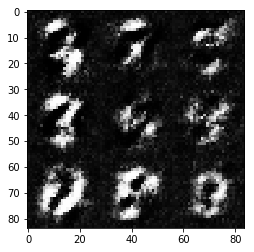

epoch 1/2 discriminator loss: 0.6925 generator loss: 1.4362
epoch 1/2 discriminator loss: 0.6794 generator loss: 1.3686
epoch 1/2 discriminator loss: 0.6522 generator loss: 1.1022
epoch 1/2 discriminator loss: 1.3096 generator loss: 2.8235
epoch 1/2 discriminator loss: 0.6749 generator loss: 1.0464
epoch 1/2 discriminator loss: 0.6238 generator loss: 2.0235
epoch 1/2 discriminator loss: 0.7403 generator loss: 1.6379
epoch 1/2 discriminator loss: 0.6174 generator loss: 1.9342
epoch 1/2 discriminator loss: 0.5799 generator loss: 1.5700
epoch 1/2 discriminator loss: 1.2262 generator loss: 0.4374


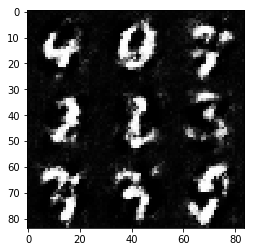

epoch 1/2 discriminator loss: 0.4661 generator loss: 1.6911
epoch 1/2 discriminator loss: 0.7557 generator loss: 0.9214
epoch 1/2 discriminator loss: 1.0313 generator loss: 0.5926
epoch 1/2 discriminator loss: 0.5742 generator loss: 1.2773
epoch 1/2 discriminator loss: 0.5501 generator loss: 1.3938
epoch 1/2 discriminator loss: 0.4633 generator loss: 1.5620
epoch 1/2 discriminator loss: 0.4501 generator loss: 1.8599
epoch 1/2 discriminator loss: 0.4867 generator loss: 2.0159
epoch 1/2 discriminator loss: 0.4702 generator loss: 2.2798
epoch 1/2 discriminator loss: 0.5140 generator loss: 2.2297


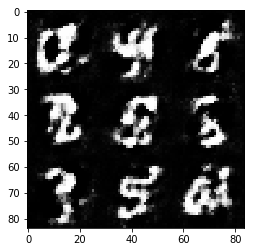

epoch 1/2 discriminator loss: 0.4339 generator loss: 2.1967
epoch 1/2 discriminator loss: 0.4913 generator loss: 1.3298
epoch 1/2 discriminator loss: 0.5860 generator loss: 1.4166
epoch 1/2 discriminator loss: 0.4531 generator loss: 1.7460
epoch 1/2 discriminator loss: 0.4015 generator loss: 2.1531
epoch 1/2 discriminator loss: 0.4233 generator loss: 1.8438
epoch 1/2 discriminator loss: 0.4171 generator loss: 1.6380
epoch 1/2 discriminator loss: 0.4697 generator loss: 1.5252
epoch 1/2 discriminator loss: 0.6642 generator loss: 2.7975
epoch 1/2 discriminator loss: 0.7733 generator loss: 0.9240


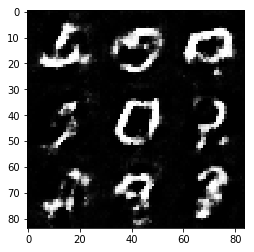

epoch 1/2 discriminator loss: 0.4583 generator loss: 1.5504
epoch 1/2 discriminator loss: 0.3477 generator loss: 2.1631
epoch 1/2 discriminator loss: 0.5927 generator loss: 1.3075
epoch 1/2 discriminator loss: 0.5671 generator loss: 1.4673
epoch 1/2 discriminator loss: 0.7692 generator loss: 1.9681
epoch 1/2 discriminator loss: 0.7201 generator loss: 0.9873
epoch 1/2 discriminator loss: 1.6702 generator loss: 0.3362
epoch 1/2 discriminator loss: 0.6783 generator loss: 1.1312
epoch 1/2 discriminator loss: 0.6247 generator loss: 1.2605
epoch 1/2 discriminator loss: 0.6900 generator loss: 1.8223


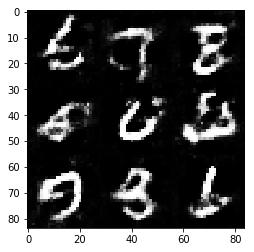

epoch 1/2 discriminator loss: 0.7579 generator loss: 1.8403
epoch 1/2 discriminator loss: 0.9253 generator loss: 0.7043
epoch 1/2 discriminator loss: 0.7347 generator loss: 1.0150
epoch 1/2 discriminator loss: 0.7429 generator loss: 1.8372
epoch 1/2 discriminator loss: 0.5956 generator loss: 1.8659
epoch 1/2 discriminator loss: 0.7199 generator loss: 1.3952
epoch 1/2 discriminator loss: 1.0004 generator loss: 2.1974
epoch 1/2 discriminator loss: 0.7110 generator loss: 1.1571
epoch 1/2 discriminator loss: 1.1097 generator loss: 0.5674
epoch 1/2 discriminator loss: 0.6683 generator loss: 1.1608


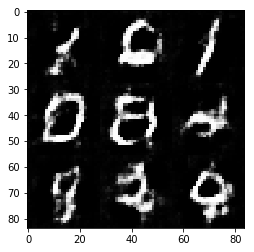

epoch 2/2 discriminator loss: 0.6728 generator loss: 1.4000
epoch 2/2 discriminator loss: 1.1665 generator loss: 0.5310
epoch 2/2 discriminator loss: 0.5692 generator loss: 1.4545
epoch 2/2 discriminator loss: 0.7123 generator loss: 1.1177
epoch 2/2 discriminator loss: 0.6140 generator loss: 1.5784


OSError: cannot identify image file './data\\mnist\\image_14575.jpg'

In [12]:
batch_size = 100
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

epoch 1/1 discriminator loss: 1.0103 generator loss: 0.6774
epoch 1/1 discriminator loss: 0.8376 generator loss: 0.8394
epoch 1/1 discriminator loss: 0.6085 generator loss: 1.1602
epoch 1/1 discriminator loss: 0.3961 generator loss: 1.6007
epoch 1/1 discriminator loss: 0.3988 generator loss: 1.5405
epoch 1/1 discriminator loss: 0.2888 generator loss: 1.7937
epoch 1/1 discriminator loss: 0.4553 generator loss: 1.6329
epoch 1/1 discriminator loss: 0.7471 generator loss: 1.1432
epoch 1/1 discriminator loss: 1.0562 generator loss: 0.5567
epoch 1/1 discriminator loss: 1.1675 generator loss: 0.5366


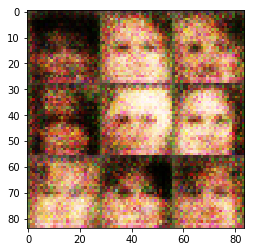

epoch 1/1 discriminator loss: 0.7465 generator loss: 0.9589
epoch 1/1 discriminator loss: 1.4370 generator loss: 3.8463
epoch 1/1 discriminator loss: 0.6613 generator loss: 1.2844
epoch 1/1 discriminator loss: 0.6440 generator loss: 1.5109
epoch 1/1 discriminator loss: 0.9416 generator loss: 2.1782
epoch 1/1 discriminator loss: 0.7032 generator loss: 1.3232
epoch 1/1 discriminator loss: 0.5848 generator loss: 1.4090
epoch 1/1 discriminator loss: 0.6120 generator loss: 2.4860
epoch 1/1 discriminator loss: 0.4901 generator loss: 1.6529
epoch 1/1 discriminator loss: 0.7075 generator loss: 1.3259


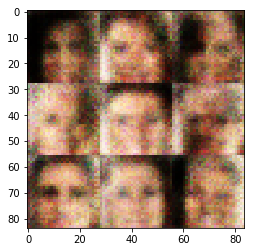

epoch 1/1 discriminator loss: 0.6609 generator loss: 1.1280
epoch 1/1 discriminator loss: 0.5820 generator loss: 1.1618
epoch 1/1 discriminator loss: 0.7881 generator loss: 1.2286
epoch 1/1 discriminator loss: 0.7939 generator loss: 0.9157
epoch 1/1 discriminator loss: 0.7210 generator loss: 1.2384
epoch 1/1 discriminator loss: 0.7117 generator loss: 1.6318
epoch 1/1 discriminator loss: 0.7835 generator loss: 0.8769
epoch 1/1 discriminator loss: 0.4765 generator loss: 2.0160
epoch 1/1 discriminator loss: 0.5210 generator loss: 1.3777
epoch 1/1 discriminator loss: 0.6996 generator loss: 1.0724


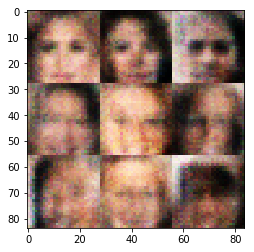

epoch 1/1 discriminator loss: 0.5805 generator loss: 1.2263
epoch 1/1 discriminator loss: 1.0563 generator loss: 0.5887
epoch 1/1 discriminator loss: 0.8445 generator loss: 0.8096
epoch 1/1 discriminator loss: 0.5109 generator loss: 1.6364
epoch 1/1 discriminator loss: 0.5879 generator loss: 1.6441
epoch 1/1 discriminator loss: 0.3578 generator loss: 1.8170
epoch 1/1 discriminator loss: 0.5515 generator loss: 1.3160
epoch 1/1 discriminator loss: 0.8119 generator loss: 0.8237
epoch 1/1 discriminator loss: 0.6793 generator loss: 0.9359
epoch 1/1 discriminator loss: 0.3929 generator loss: 2.0185


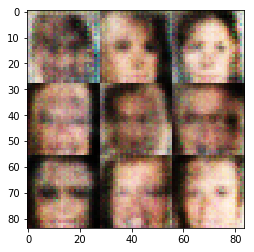

epoch 1/1 discriminator loss: 0.3664 generator loss: 1.5540
epoch 1/1 discriminator loss: 1.7269 generator loss: 0.2470
epoch 1/1 discriminator loss: 1.4998 generator loss: 0.3574
epoch 1/1 discriminator loss: 0.4624 generator loss: 1.3970
epoch 1/1 discriminator loss: 0.7044 generator loss: 2.0714
epoch 1/1 discriminator loss: 0.8367 generator loss: 2.5749
epoch 1/1 discriminator loss: 0.8673 generator loss: 1.1388
epoch 1/1 discriminator loss: 0.7584 generator loss: 1.5087
epoch 1/1 discriminator loss: 0.8737 generator loss: 1.1348
epoch 1/1 discriminator loss: 0.8496 generator loss: 0.9212


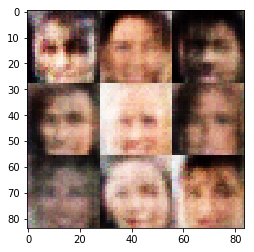

epoch 1/1 discriminator loss: 1.3533 generator loss: 0.4328
epoch 1/1 discriminator loss: 1.0629 generator loss: 0.5614
epoch 1/1 discriminator loss: 0.8965 generator loss: 0.9140
epoch 1/1 discriminator loss: 1.2349 generator loss: 0.4817
epoch 1/1 discriminator loss: 1.4340 generator loss: 0.4016
epoch 1/1 discriminator loss: 0.7514 generator loss: 1.2586
epoch 1/1 discriminator loss: 1.2267 generator loss: 0.5402
epoch 1/1 discriminator loss: 0.9210 generator loss: 1.1684
epoch 1/1 discriminator loss: 0.5688 generator loss: 2.1741
epoch 1/1 discriminator loss: 0.6963 generator loss: 1.1332


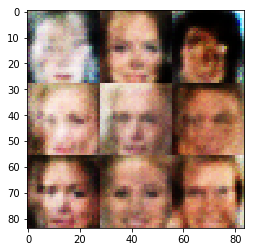

epoch 1/1 discriminator loss: 1.3854 generator loss: 3.5344
epoch 1/1 discriminator loss: 0.5985 generator loss: 1.2154
epoch 1/1 discriminator loss: 1.2755 generator loss: 0.4507
epoch 1/1 discriminator loss: 0.7960 generator loss: 0.9458
epoch 1/1 discriminator loss: 0.6489 generator loss: 1.0373
epoch 1/1 discriminator loss: 1.4167 generator loss: 0.3986
epoch 1/1 discriminator loss: 1.1115 generator loss: 0.8670
epoch 1/1 discriminator loss: 0.7336 generator loss: 1.1426
epoch 1/1 discriminator loss: 0.9487 generator loss: 0.7229
epoch 1/1 discriminator loss: 0.7227 generator loss: 1.0348


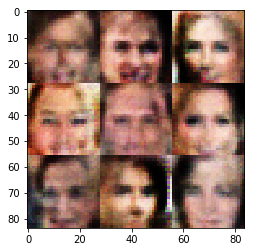

epoch 1/1 discriminator loss: 1.3066 generator loss: 0.4395
epoch 1/1 discriminator loss: 0.7372 generator loss: 0.8915
epoch 1/1 discriminator loss: 0.4762 generator loss: 2.0494
epoch 1/1 discriminator loss: 0.7739 generator loss: 1.5037
epoch 1/1 discriminator loss: 0.8423 generator loss: 2.0090
epoch 1/1 discriminator loss: 0.9817 generator loss: 0.9593
epoch 1/1 discriminator loss: 0.6096 generator loss: 2.1073
epoch 1/1 discriminator loss: 0.6887 generator loss: 1.1130
epoch 1/1 discriminator loss: 0.6670 generator loss: 2.1633
epoch 1/1 discriminator loss: 0.8989 generator loss: 0.9374


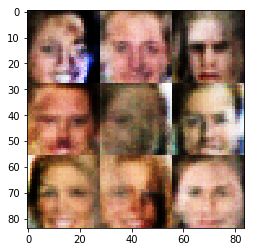

epoch 1/1 discriminator loss: 0.3025 generator loss: 2.6601
epoch 1/1 discriminator loss: 1.5002 generator loss: 3.6049
epoch 1/1 discriminator loss: 0.6863 generator loss: 1.1033
epoch 1/1 discriminator loss: 0.8465 generator loss: 0.8830
epoch 1/1 discriminator loss: 0.8082 generator loss: 0.8426
epoch 1/1 discriminator loss: 0.5417 generator loss: 2.3543
epoch 1/1 discriminator loss: 0.5185 generator loss: 1.6851
epoch 1/1 discriminator loss: 0.3955 generator loss: 1.7491
epoch 1/1 discriminator loss: 0.8338 generator loss: 0.8511
epoch 1/1 discriminator loss: 0.5284 generator loss: 1.2594


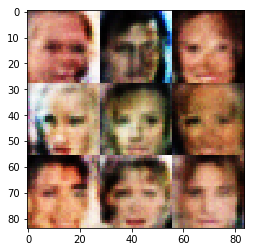

epoch 1/1 discriminator loss: 0.1881 generator loss: 2.8708
epoch 1/1 discriminator loss: 2.8517 generator loss: 0.0772
epoch 1/1 discriminator loss: 1.0492 generator loss: 0.7956
epoch 1/1 discriminator loss: 0.6329 generator loss: 1.1769
epoch 1/1 discriminator loss: 0.4981 generator loss: 1.8150
epoch 1/1 discriminator loss: 1.2007 generator loss: 0.5237
epoch 1/1 discriminator loss: 0.8900 generator loss: 2.4670
epoch 1/1 discriminator loss: 0.4266 generator loss: 1.5325
epoch 1/1 discriminator loss: 0.6065 generator loss: 1.4196
epoch 1/1 discriminator loss: 0.4073 generator loss: 2.4697


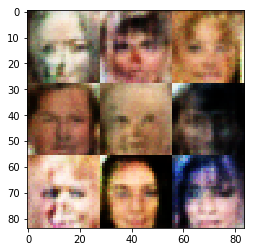

In [ ]:
batch_size = 100
z_dim = 200
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.